In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

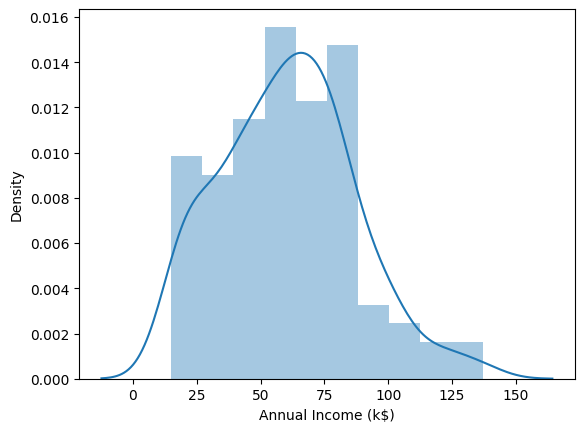

In [7]:
sns.distplot(df['Annual Income (k$)'])

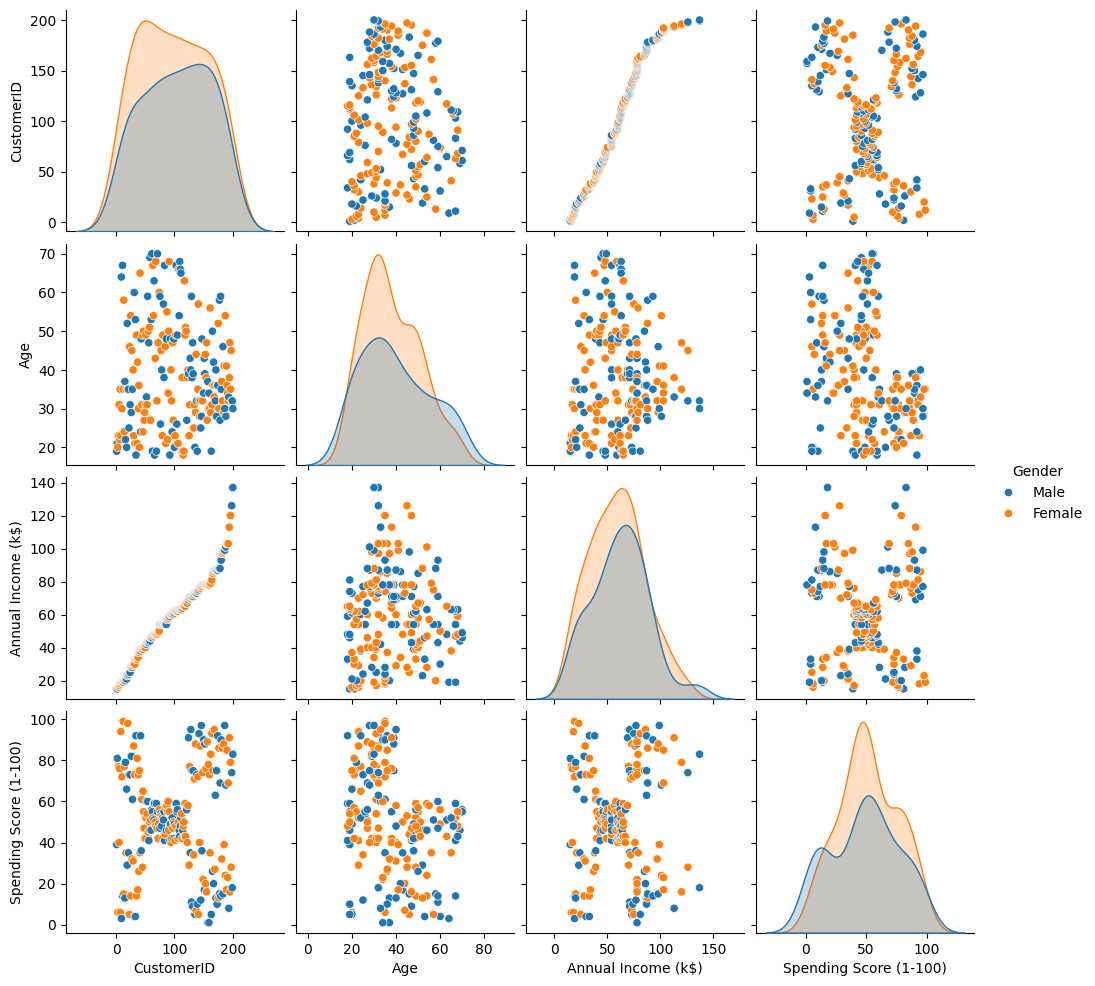

In [23]:
sns.pairplot(df,hue='Gender')

In [25]:
clustering = KMeans(n_clusters=5)
clustering.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,1


In [ ]:
inertia_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_scores)

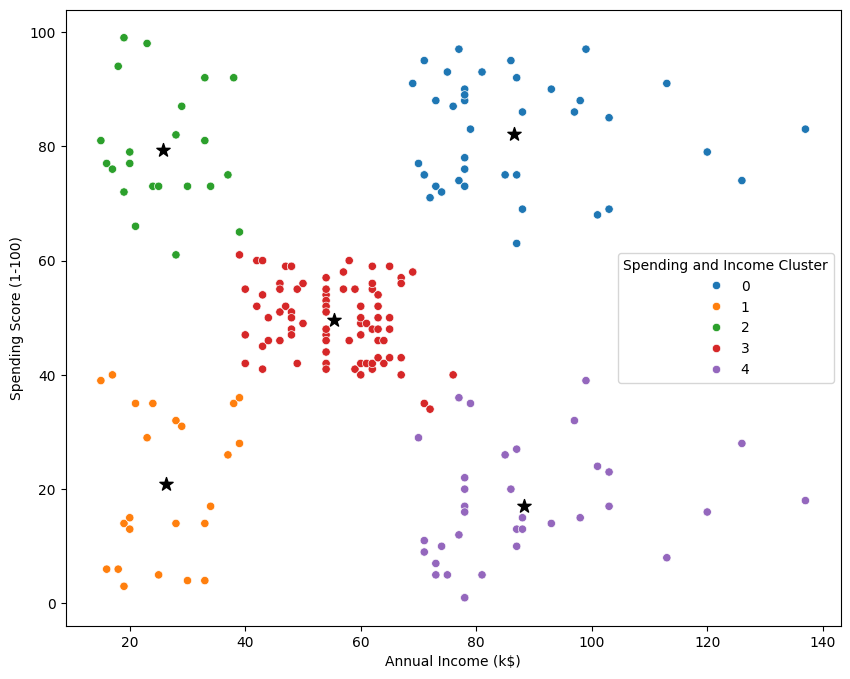

In [27]:
centers = pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['x','y']

plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivariate.png')

In [29]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.590909,0.409091
3,0.592593,0.407407
4,0.457143,0.542857


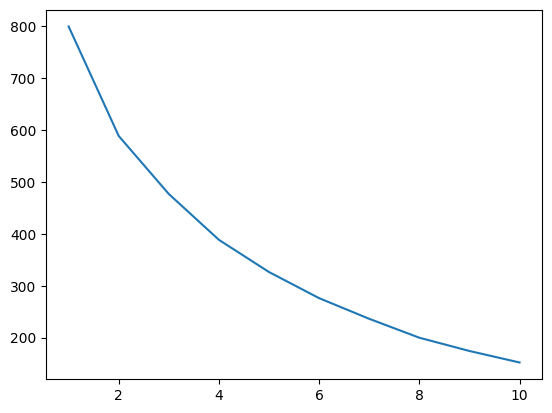

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

dff = pd.get_dummies(df, drop_first=True)
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff = scale.fit_transform(dff)
dff = pd.DataFrame(scale.fit_transform(dff))

inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dff)
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_scores)

In [32]:
df.to_csv('clustering.csv')